In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

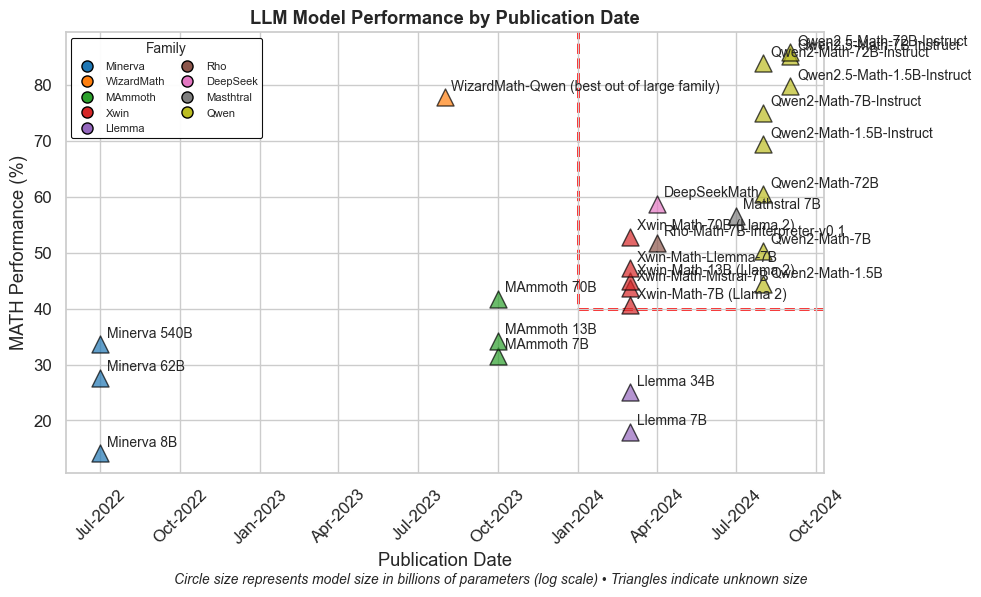

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import os

# Set the Seaborn style and context
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.1)

# Load the data
df = pd.read_csv('/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/Master Thesis/math_reasoning_language_models/data/graph_data/Math LLMs Table.csv')

# Convert Size to numeric, setting empty or invalid values to NaN
df['Size (in Billion)'] = pd.to_numeric(df['Size (in Billion)'], errors='coerce')

# Create a new column to identify points with missing size data
df['has_size'] = ~df['Size (in Billion)'].isna()

# Normalize the sizes and make them bigger overall
df['Size_Normalized'] = np.where(
    df['has_size'],
    np.log10(df['Size (in Billion)'].fillna(1)) * 200,
    100  # Default size for points without size data
)

# Convert Published dates to proper datetime objects
df['Date'] = pd.to_datetime(df['Published'] + '-01', format='%y-%b-%d')

# Sort by date
df = df.sort_values('Date')

# Create figure
plt.figure(figsize=(10, 6))

# Create a consistent color palette for all families
all_families = df['Family'].unique()
palette = sns.color_palette("tab10", n_colors=len(all_families))
family_colors = dict(zip(all_families, palette))

# Create a plot for each family separately to ensure consistent colors
for family in all_families:
    family_df = df[df['Family'] == family]
    
    # Plot points with size data (circles)
    if not family_df[family_df['has_size']].empty:
        sns.scatterplot(
            x='Date',
            y='MATH Performance',
            size='Size_Normalized',
            data=family_df[family_df['has_size']],
            color=family_colors[family],
            alpha=0.7,
            edgecolor='black',
            linewidth=1,
            sizes=(50, 400),  # Range of sizes for the scatter points
            legend=False,
            label=family
        )
    
    # Plot points without size data (triangles)
    if not family_df[~family_df['has_size']].empty:
        plt.scatter(
            family_df[~family_df['has_size']]['Date'],
            family_df[~family_df['has_size']]['MATH Performance'],
            s=150,
            color=family_colors[family],
            alpha=0.7,
            marker='^',
            edgecolor='black',
            linewidth=1
        )

# Add labels for each point
for i, row in df.iterrows():
    if row['has_size']:
        label = f"{row['Name']} ({int(row['Size (in Billion)'])}B)"
    else:
        label = f"{row['Name']}"
    plt.annotate(label,
                (row['Date'], row['MATH Performance']),
                fontsize=10,
                xytext=(5, 5),
                textcoords='offset points')

# Create custom legend for families
custom_legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w',
              markerfacecolor=family_colors[family],
              markeredgecolor='black',
              markersize=8,  # Even larger marker
              label=family)
    for family in all_families
]

# Configure legend 
leg = plt.legend(handles=custom_legend_handles, 
           title='Family',
           loc='upper left',
           ncol=2,  # Keep 2 columns
           framealpha=0.95,
           fontsize=8,  # Much larger font (normal size)
           title_fontsize=10,  # Large title
           markerscale=1.0,  # Full size markers
           columnspacing=1.0,  # Standard column spacing
           handletextpad=0.7)  # More padding

# Add a border to the legend to make it stand out
leg.get_frame().set_linewidth(0.8)
leg.get_frame().set_edgecolor('black')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Publication Date')
plt.ylabel('MATH Performance (%)')
plt.title('LLM Model Performance by Publication Date', fontweight='bold')

# Add a red dotted box to highlight the region with >70% accuracy from Jan 2024
highlight_start_date = pd.to_datetime('2024-01-01')
highlight_min_performance = 40
highlight_end_date = pd.to_datetime('2025-03-01')

# Create a rectangle to highlight the region
rect = plt.Rectangle(
    (highlight_start_date, highlight_min_performance),
    highlight_end_date - highlight_start_date,
    100 - highlight_min_performance,
    fill=False,
    edgecolor='red',
    linestyle='--',
    linewidth=2,
    zorder=0
)
plt.gca().add_patch(rect)

# Add a note about bubble sizes
plt.figtext(0.5, 0.01, 'Circle size represents model size in billions of parameters (log scale) • Triangles indicate unknown size',
          ha='center', fontsize=10, style='italic')

plt.tight_layout()


# Define your target directory - fix the path
save_dir = "/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/Master Thesis/math_reasoning_language_models/plots/plots_images"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Create the full file path
file_path = os.path.join(save_dir, "MATH_math_llms_big_plot.png")

# Save the figure
plt.savefig(file_path, dpi=300, bbox_inches="tight")


plt.show()

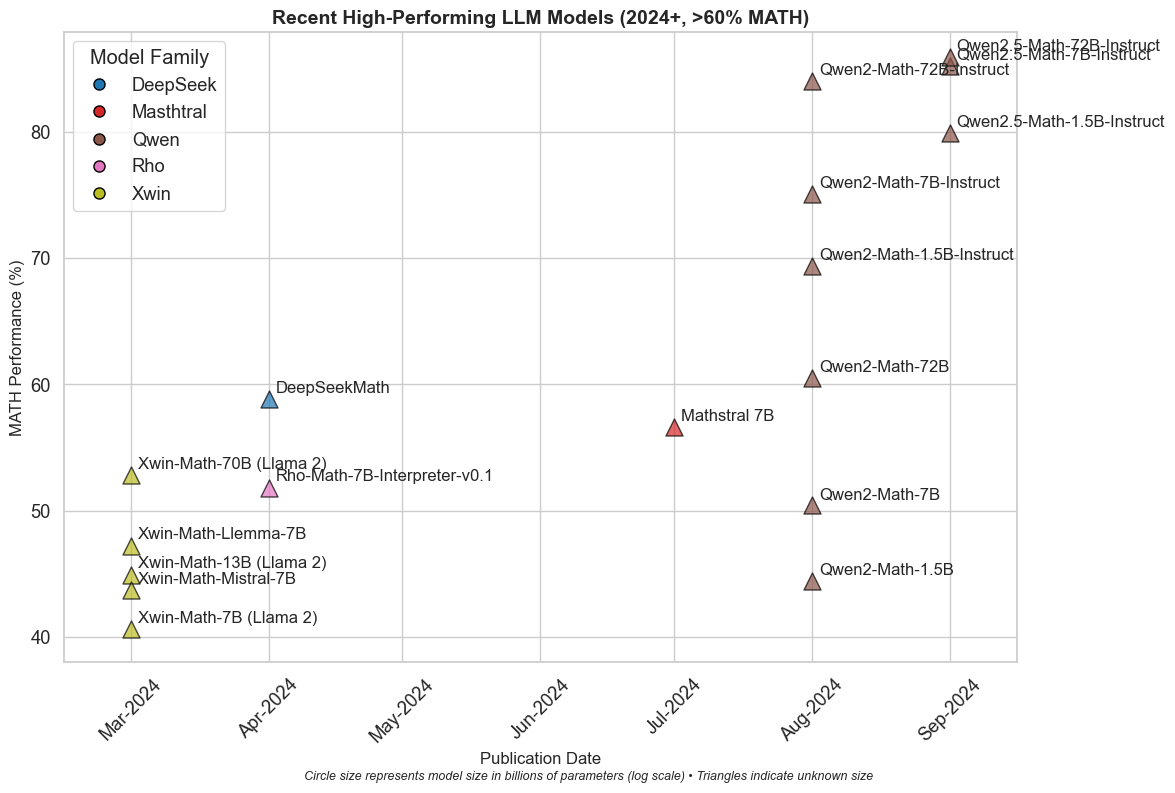

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import os

# Set the Seaborn style and context
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Load the data
df = pd.read_csv('/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/Master Thesis/math_reasoning_language_models/data/graph_data/Math LLMs Table.csv')

# Convert Size to numeric, setting empty or invalid values to NaN
df['Size (in Billion)'] = pd.to_numeric(df['Size (in Billion)'], errors='coerce')

# Create a new column to identify points with missing size data
df['has_size'] = ~df['Size (in Billion)'].isna()

# Normalize the sizes and make them bigger overall
df['Size_Normalized'] = np.where(
    df['has_size'],
    np.log10(df['Size (in Billion)'].fillna(1)) * 200,
    100  # Default size for points without size data
)

# Convert Published dates to proper datetime objects
df['Date'] = pd.to_datetime(df['Published'] + '-01', format='%y-%b-%d')

# Filter data for the zoomed view
start_date = pd.to_datetime('2024-01-01')
min_performance = 40
zoomed_df = df[(df['Date'] >= start_date) & (df['MATH Performance'] >= min_performance)]

# Create figure with only the zoomed view
plt.figure(figsize=(12, 8))

# Create a consistent color palette for all families
all_families = df['Family'].unique()  # Use all families for consistent color mapping
palette = sns.color_palette("tab10", n_colors=len(all_families))
family_colors = dict(zip(all_families, palette))

if not zoomed_df.empty:
    # Create a plot for each family separately to ensure consistent colors
    zoomed_families = zoomed_df['Family'].unique()
    
    for family in zoomed_families:
        family_df = zoomed_df[zoomed_df['Family'] == family]
        
        # Get the color for this family from the full dataset color mapping
        color = family_colors[family]
        
        # Plot points with size data (circles)
        if not family_df[family_df['has_size']].empty:
            sns.scatterplot(
                x='Date',
                y='MATH Performance',
                size='Size_Normalized',
                data=family_df[family_df['has_size']],
                color=color,
                alpha=0.7,
                edgecolor='black',
                linewidth=1,
                sizes=(50, 400),  # Range of sizes for the scatter points
                legend=False
            )
        
        # Plot points without size data (triangles)
        if not family_df[~family_df['has_size']].empty:
            plt.scatter(
                family_df[~family_df['has_size']]['Date'],
                family_df[~family_df['has_size']]['MATH Performance'],
                s=150,
                color=color,
                alpha=0.7,
                marker='^',
                edgecolor='black',
                linewidth=1
            )

    # Add labels for all points in the zoomed view
    for i, row in zoomed_df.iterrows():
        if row['has_size']:
            label = f"{row['Name']} ({int(row['Size (in Billion)'])}B)"
        else:
            label = f"{row['Name']}"
        
        plt.annotate(label, 
                    (row['Date'], row['MATH Performance']),
                    fontsize=12,
                    xytext=(5, 5),
                    textcoords='offset points')

    # Set axis limits for zoomed view
    min_date = zoomed_df['Date'].min() - pd.Timedelta(days=15)
    max_date = zoomed_df['Date'].max() + pd.Timedelta(days=15)
    min_perf = min_performance - 2
    max_perf = zoomed_df['MATH Performance'].max() + 2
    
    plt.xlim(min_date, max_date)
    plt.ylim(min_perf, max_perf)
else:
    plt.text(0.5, 0.5, "No models in the selected range", 
             ha='center', va='center', transform=plt.gca().transAxes,
             fontsize=14)

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Publication Date', fontsize=12)
plt.ylabel('MATH Performance (%)', fontsize=12)
plt.title('Recent High-Performing LLM Models (2024+, >60% MATH)', fontsize=14, fontweight='bold')

# Create a custom legend with consistent marker sizes
custom_legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', 
               markerfacecolor=family_colors[family],
               markeredgecolor='black',
               markersize=8,
               label=family)
    for family in zoomed_families
]

# Add the custom legend
plt.legend(handles=custom_legend_handles, title='Model Family', loc='best')

# Add a note about bubble sizes that explains the triangle meaning without a legend
plt.figtext(0.5, 0.01, 'Circle size represents model size in billions of parameters (log scale) • Triangles indicate unknown size',
          ha='center', fontsize=9, style='italic')

plt.tight_layout()

# Define your target directory - fix the path
save_dir = "/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/Master Thesis/math_reasoning_language_models/plots/plots_images"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Create the full file path
file_path = os.path.join(save_dir, "MATH_math_llms_zoom_plot.png")

# Save the figure
plt.savefig(file_path, dpi=300, bbox_inches="tight")

plt.show()
